# Max Risk Per Partners
Loop through every play-risk file and find the max risk for every pair.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import glob
import sys
sys.path.insert(0, '../scripts/')
from football_field import create_football_field
from plots import plot_play
import math

%matplotlib inline
pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

In [17]:
cols = ['season_year','gamekey','playid','time','left_to_right','gsisid','gsisid_partner','role','role_partner',
        'generalized_role','generalized_role_partner','punting_returning_team','punting_returning_team_partner',
        'x','y','x_partner','y_partner','dir','o','dir_partner','o_partner','dist',
        'momentum','momentum_partner','opp_momentum','risk_factor']

In [18]:
import pandas as pd
import glob
import os

path = '../working/playlevel/max_risk_pair/'
all_files = glob.glob(os.path.join(path, "*.parquet"))
df = pd.concat((pd.read_parquet(f)[cols] for f in all_files))

In [19]:
df.to_parquet('../working/max_risk_partners.parquet')

In [41]:
df = pd.read_parquet('../working/max_risk_partners.parquet')

In [45]:
df.loc[(df['dist'] < 0.1), 'dist'] = 0.1

In [48]:
df['risk_factor'] = df['opp_momentum'] / df['dist']

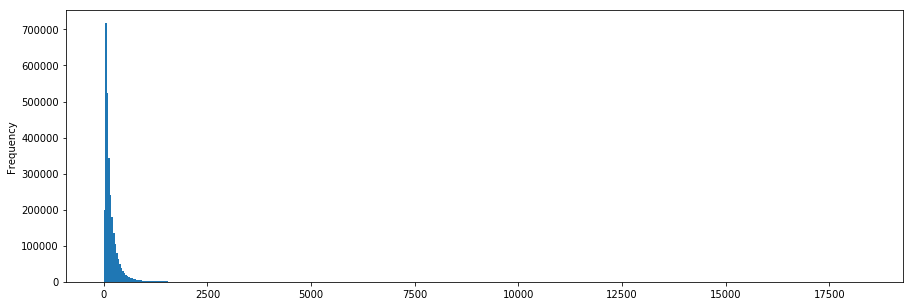

In [50]:
df['risk_factor'].plot(kind='hist', figsize=(15, 5), bins=500)

In [51]:
vr =pd.read_csv('../working/video_review-detailed.csv')

In [53]:
df.dtypes

season_year                                int64
gamekey                                    int64
playid                                     int64
time                              datetime64[ns]
left_to_right                            float64
gsisid                                   float64
gsisid_partner                           float64
role                                      object
role_partner                              object
generalized_role                          object
generalized_role_partner                  object
punting_returning_team                    object
punting_returning_team_partner            object
x                                        float64
y                                        float64
x_partner                                float64
y_partner                                float64
dir                                      float64
o                                        float64
dir_partner                              float64
o_partner           

In [56]:
injury_risk_factor =pd.merge(vr, df, left_on=['Season_Year','GameKey','PlayID','GSISID','Primary_Partner_GSISID'],
        right_on=['season_year','gamekey','playid','gsisid','gsisid_partner'],
        how='left')

In [61]:
injury_risk_list = injury_risk_factor['risk_factor'].dropna().tolist()

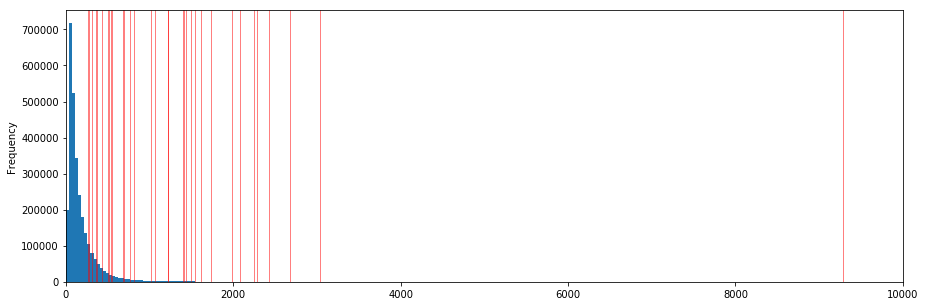

In [64]:
df['risk_factor'].plot(kind='hist', figsize=(15, 5), bins=500, xlim=(0,10000))

for value in injury_risk_list:
    plt.axvline(x=value, color='red', linewidth=0.5)

In [74]:
pairs_max_risk = df.groupby(['role','role_partner'])['risk_factor'].mean().reset_index()

In [83]:
pairs_max_risk['count'] = df.groupby(['role','role_partner'])['risk_factor'].count().reset_index()['risk_factor']

In [93]:
pairs_max_risk_atleast100 = pairs_max_risk.loc[pairs_max_risk['count'] > 100]

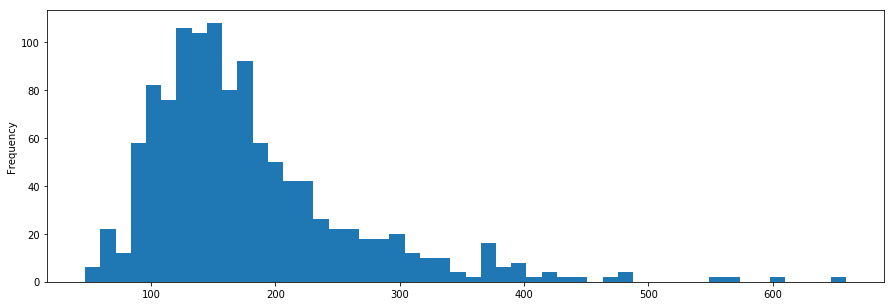

In [95]:
pairs_max_risk_atleast100.sort_values('risk_factor')['risk_factor'].plot(kind='hist', bins=50, figsize=(15, 5))

In [128]:
pairs_max_risk_atleast100.sort_values('risk_factor').head()

,role,role_partner,risk_factor,count
308,P,VL,46.887259,4092
2014,VL,P,46.887259,4092
311,P,VR,47.158092,4052
2154,VR,P,47.158092,4052
939,PFB,P,50.744710,307


In [107]:
injury_pairs = vr[['Role','Role_Primary_Partner']].drop_duplicates().dropna()
injury_pairs['Injury_Pair'] = True
injury_pairs = injury_pairs.fillna(False)
injury_pairs = injury_pairs.rename(columns={'Role':'role', 'Role_Primary_Partner': 'role_partner'})

In [114]:
injury_pair_with_risk = pd.merge(pairs_max_risk_atleast100, injury_pairs, how='left').fillna(False)

In [124]:
injury_pair_with_risk['inj_pair_color'] = ['red' if x else 'blue' for x in injury_pair_with_risk['Injury_Pair']]

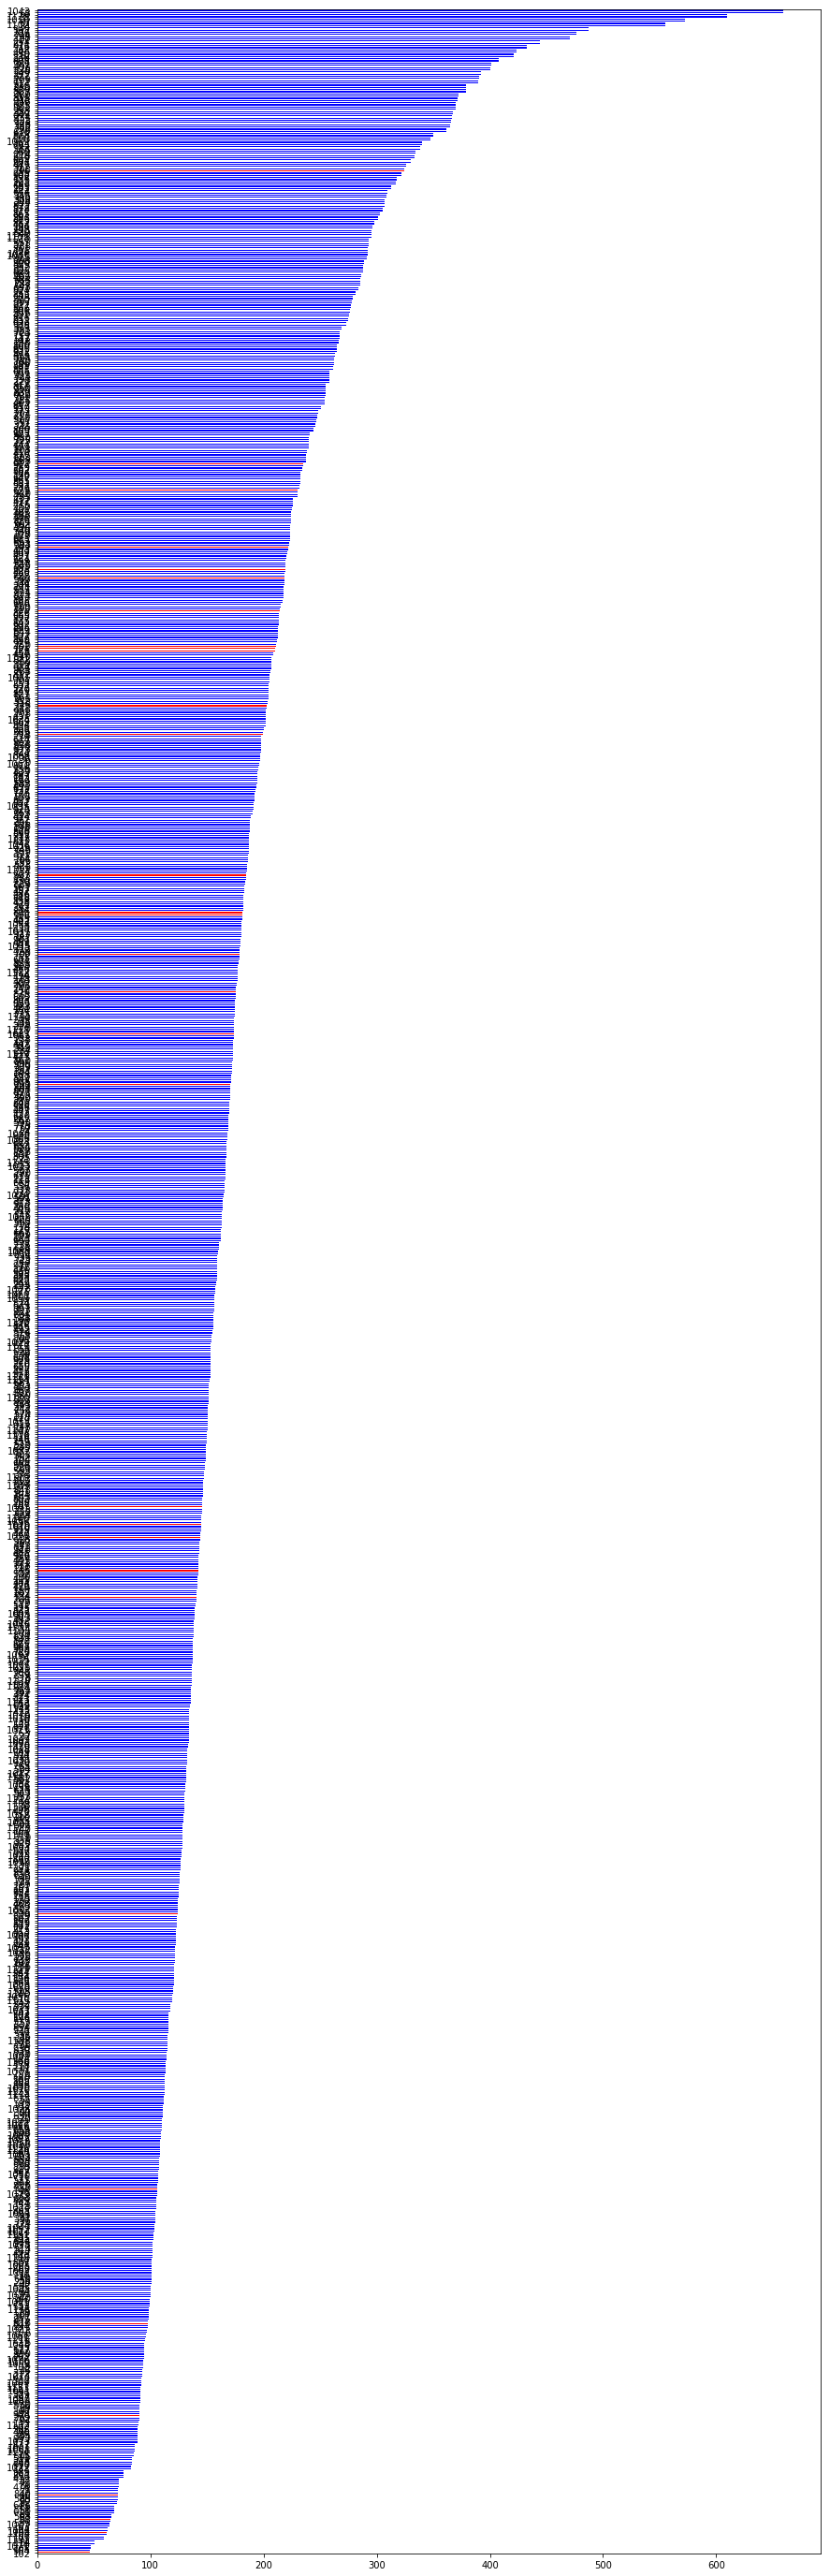

In [126]:
injury_pair_with_risk.sort_values('risk_factor')['risk_factor'].plot(kind='barh', figsize=(15, 50), color=injury_pair_with_risk['inj_pair_color'] )

In [147]:
df.shape

(2879896, 26)

In [193]:
df_match['risk_factor'].mean() + df_match['risk_factor'].std()

487.0465269889558

PLW PR


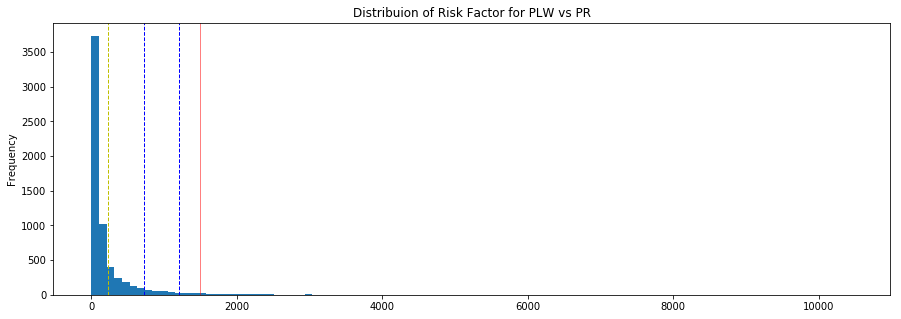

Risk factor of 1500.0344585399728
GL PR


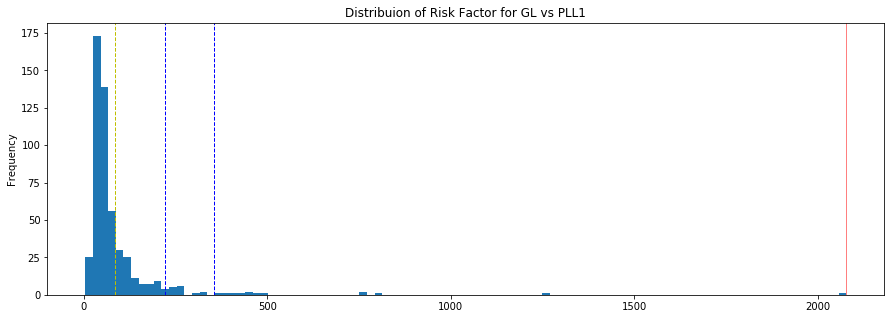

Risk factor of 2078.127437965413
GR PR


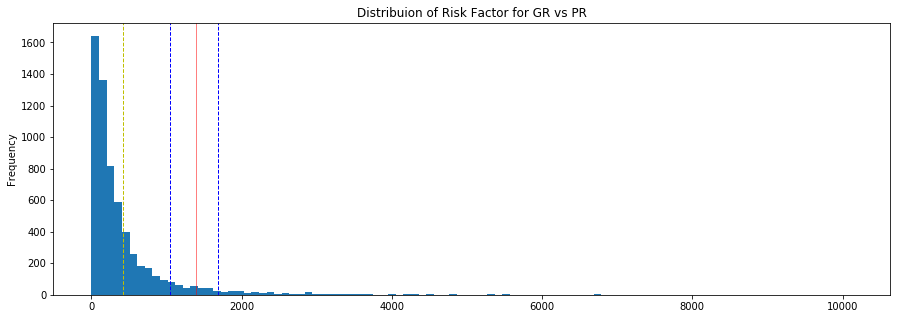

Risk factor of 1395.7936677092846
PRT PR


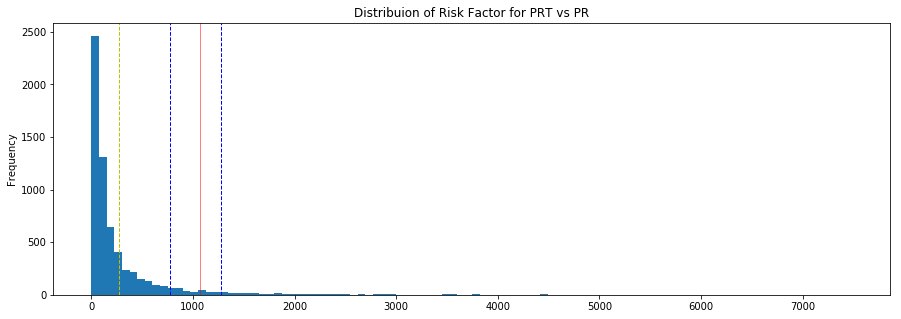

Risk factor of 1068.0448458814994
PRT PR


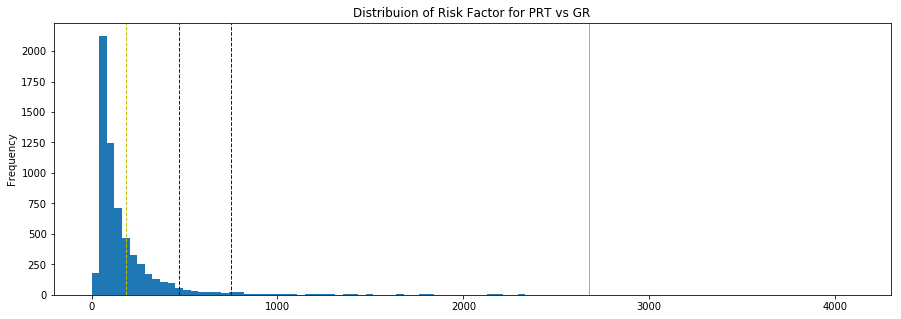

Risk factor of 2674.7906536142896
PRW PR


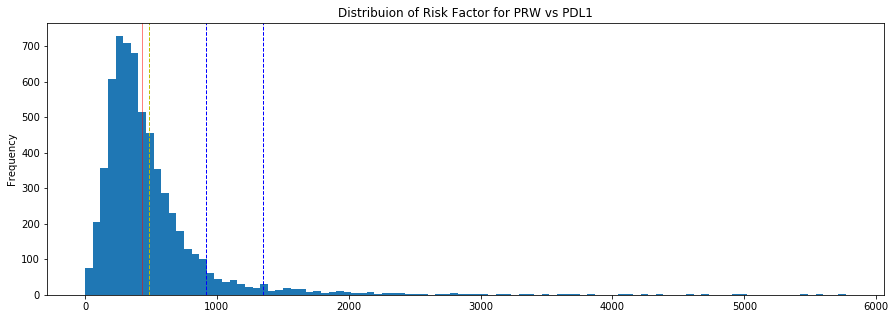

Risk factor of 433.5106569133555
VR PR


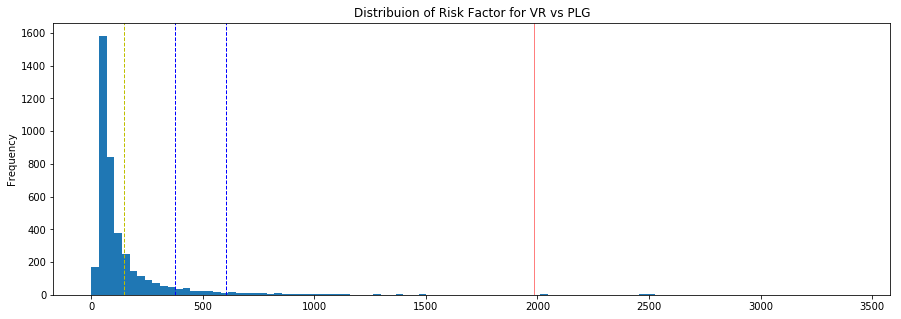

Risk factor of 1985.6028677357929
PFB PR


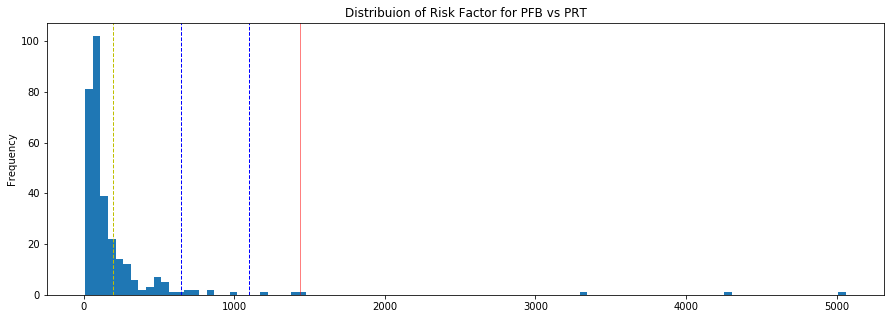

Risk factor of 1435.7060490480205
PR PR


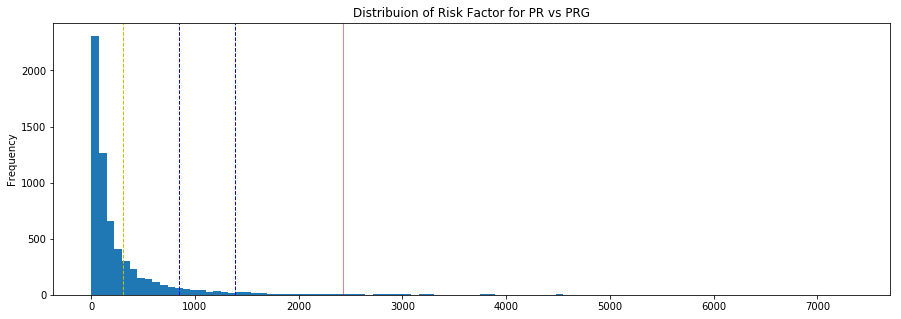

Risk factor of 2432.36085360126
Did not work
Empty 'DataFrame': no numeric data to plot
PLG PR


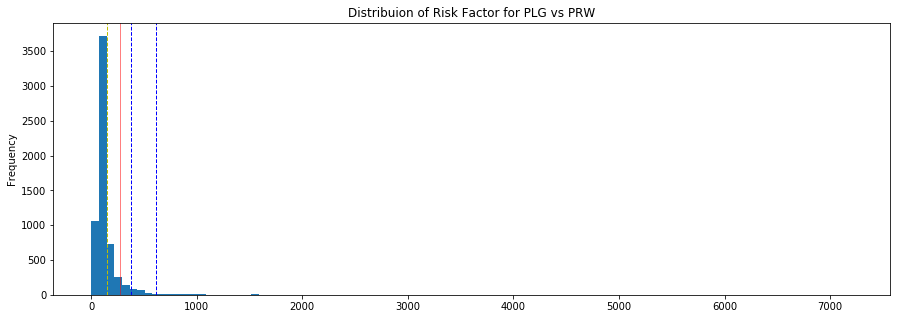

Risk factor of 273.15508819766796
PRG PR


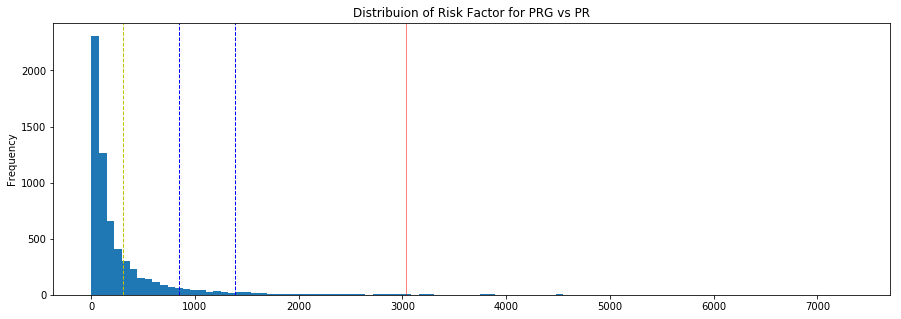

Risk factor of 3039.112647275355
PR PR


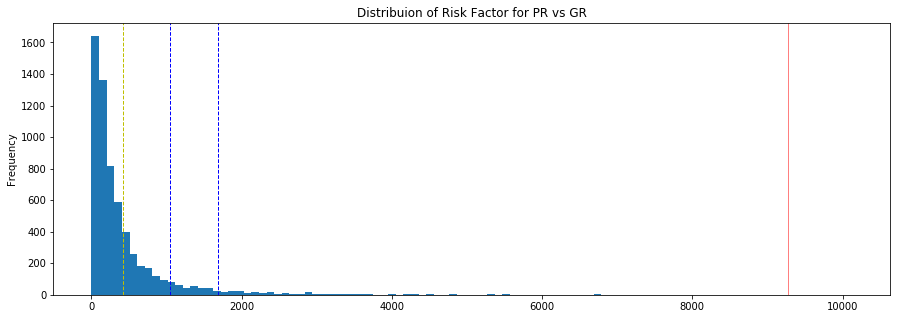

Risk factor of 9279.375380710906
P PR


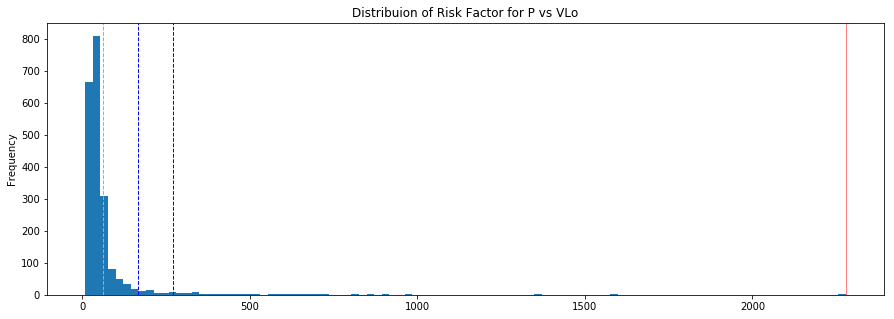

Risk factor of 2279.620366537682
PLW PR


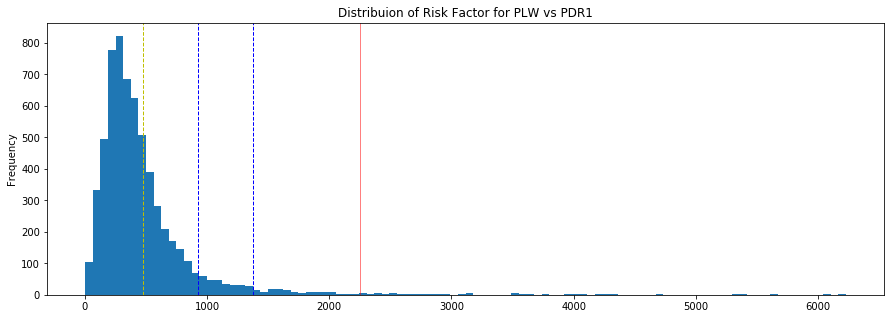

Risk factor of 2248.2499814427397
GL PR


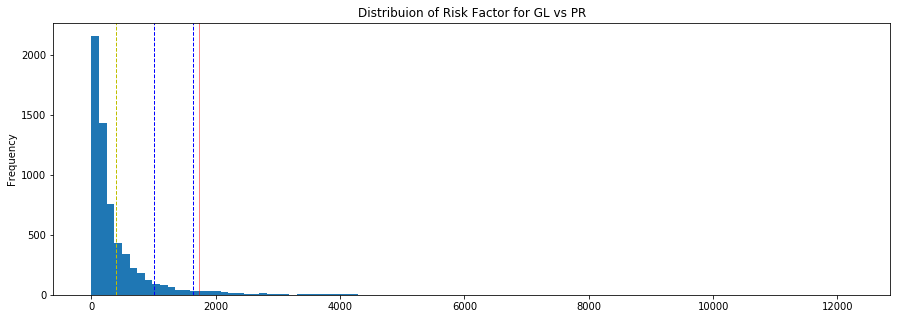

Risk factor of 1731.8073707842118
PLG PR


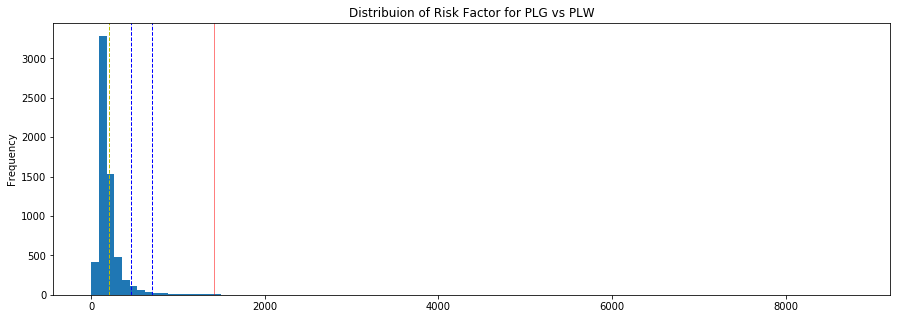

Risk factor of 1412.2225362763659
GL PR


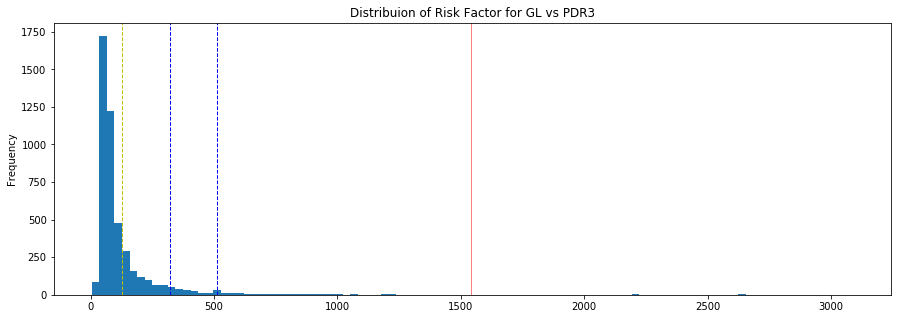

Risk factor of 1540.1298741079727
GL PR


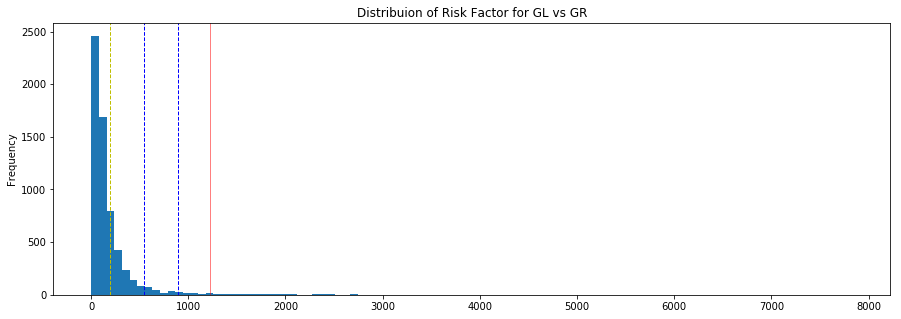

Risk factor of 1223.1090557702732
PRG PR


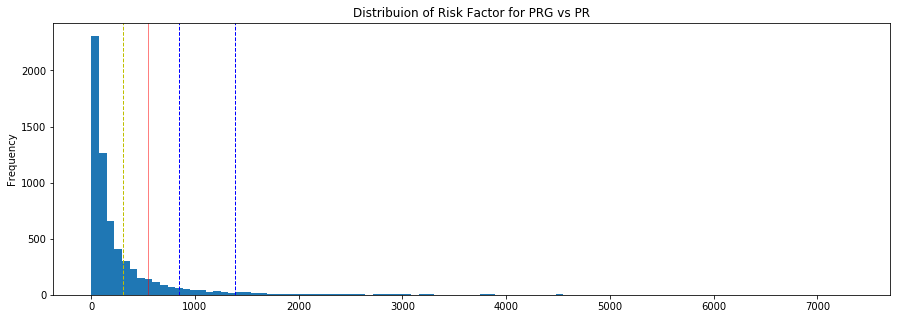

Risk factor of 550.658974636305
PLT PR


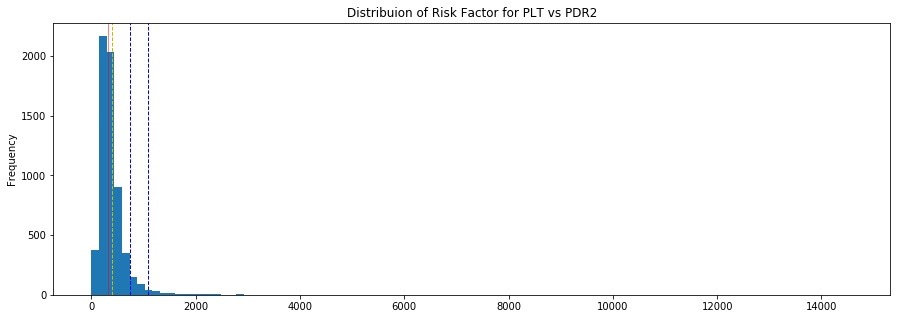

Risk factor of 311.3107585041959
PLG PR


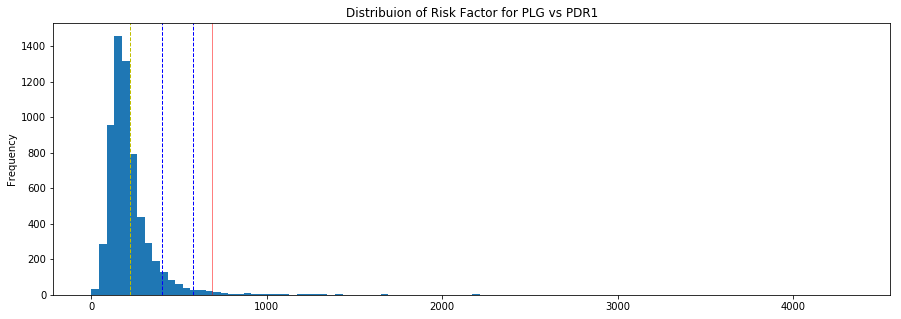

Risk factor of 689.5204857591192
PPR PR


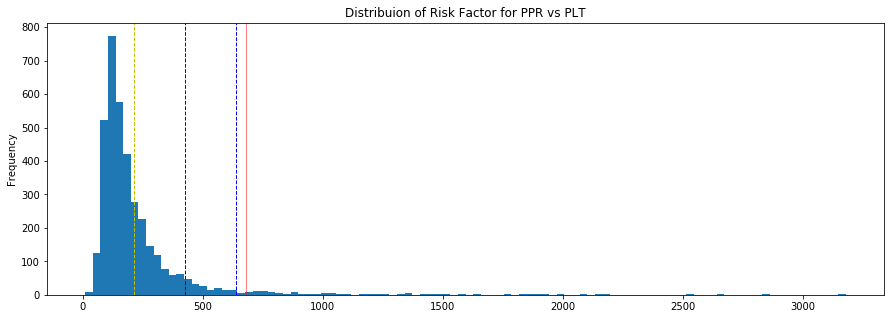

Risk factor of 679.9929307756719
PLS PR


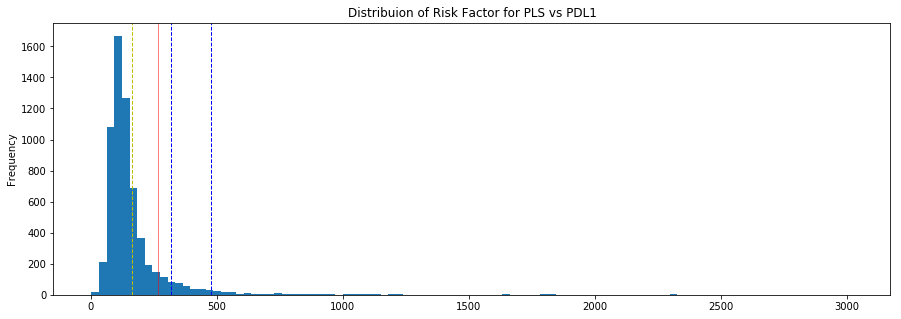

Risk factor of 264.90337996560334
PLT PR


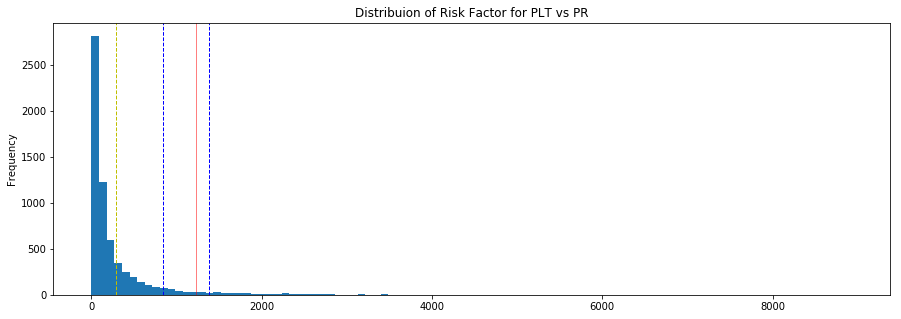

Risk factor of 1225.2336311379145
PR PR


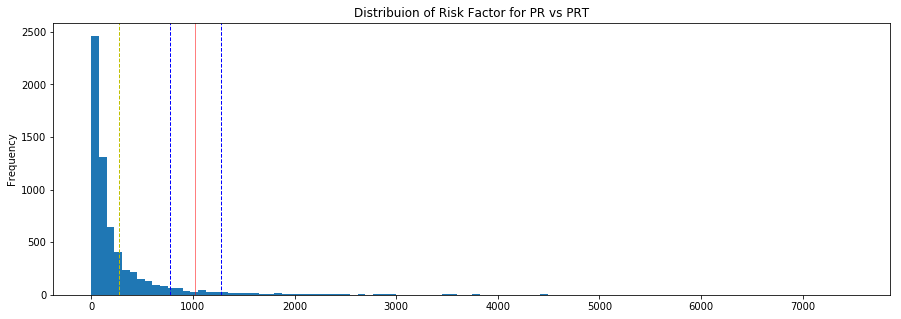

Risk factor of 1018.6997313011822
Did not work
Empty 'DataFrame': no numeric data to plot
PDR1 PR


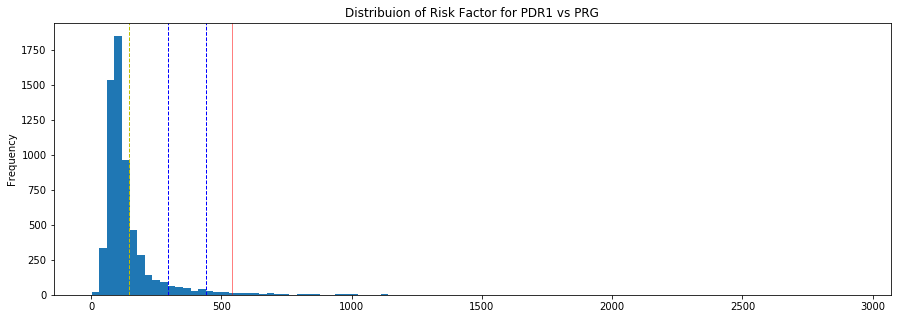

Risk factor of 542.705180850474
PRG PR


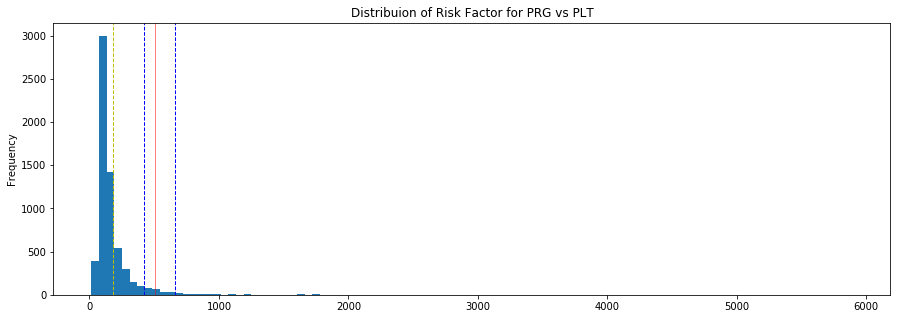

Risk factor of 509.806639850992
Did not work
Empty 'DataFrame': no numeric data to plot
PDL2 PR


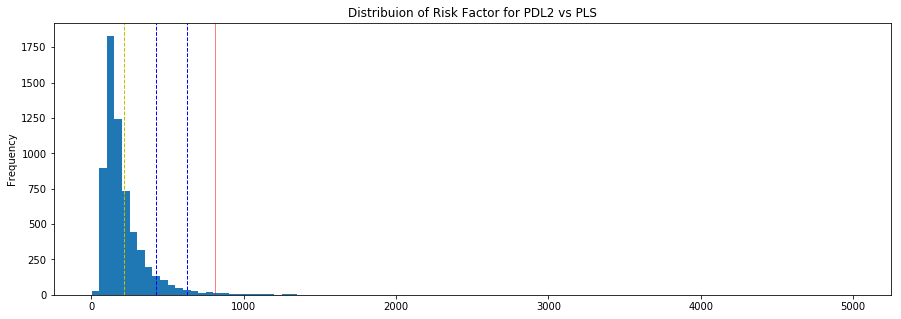

Risk factor of 810.5986528403523
PLL PR


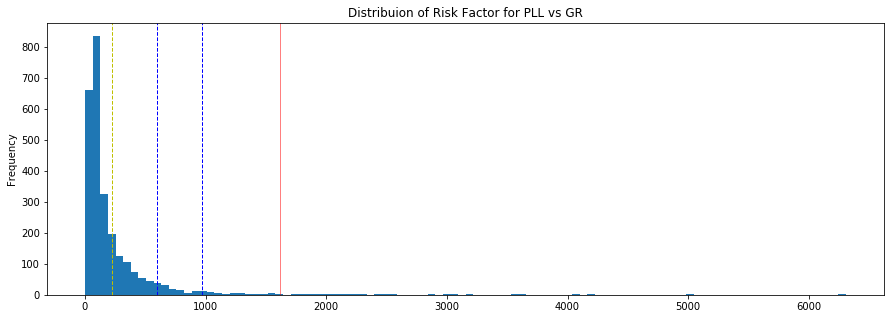

Risk factor of 1614.3617408354683
PR PR


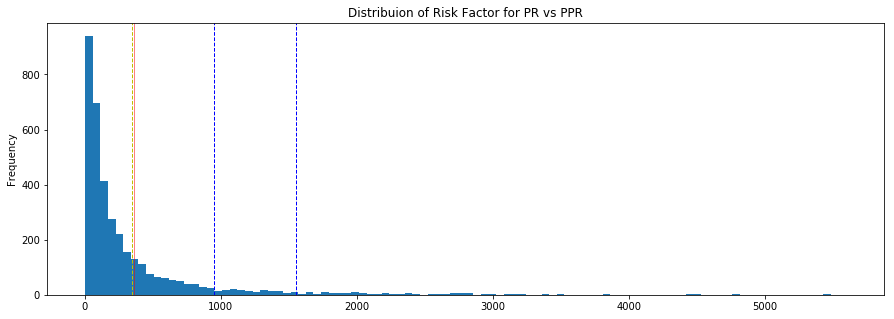

Risk factor of 362.35619812472265
Did not work
Empty 'DataFrame': no numeric data to plot
PLS PR


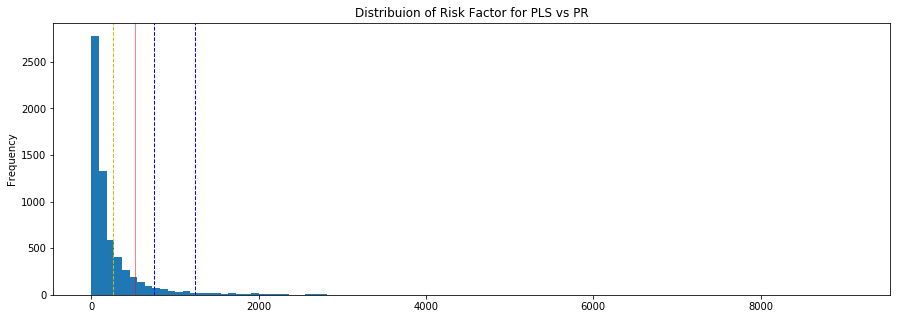

Risk factor of 521.6840506686261
PLW PR


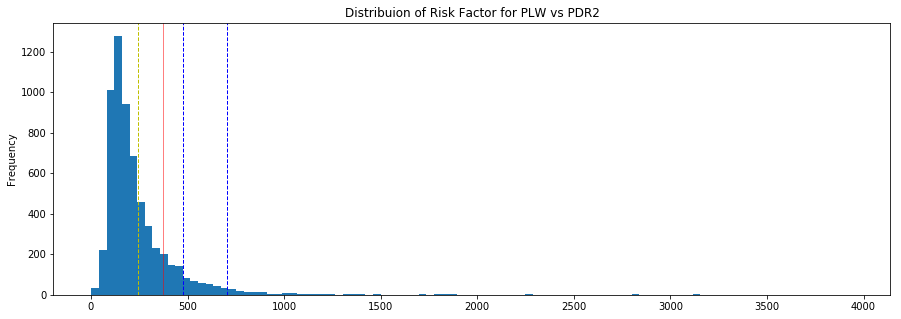

Risk factor of 375.5247218169162
PRG PR


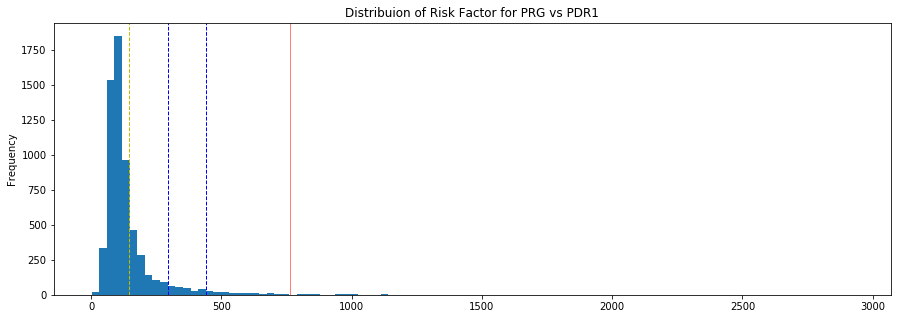

Risk factor of 763.6812429984054


In [238]:
for row in vr.iterrows():
    try:
        role = row[1]['Role']
        role_partner = row[1]['Role_Primary_Partner']
        df_match = df.loc[(df['role'] == role) & (df['role_partner'] == role_partner)]
        df_match['risk_factor'].plot(kind='hist', figsize=(15, 5), bins=100, title='Distribuion of Risk Factor for {} vs {}'.format(role, role_partner))
        print(role, role_partener)
        season_year = row[1]['Season_Year']
        gamekey = row[1]['GameKey']
        playid = row[1]['PlayID']
        risk_factor_injury = df_match.loc[(df_match['season_year'] == season_year) &
                     (df_match['gamekey'] == gamekey) &
                     (df_match['playid'] == playid)]['risk_factor'].values[0]
        plt.axvline(x=risk_factor_injury, color='red', linewidth=0.5)
        plt.axvline(df_match['risk_factor'].mean(), color='y', linestyle='dashed', linewidth=1)
        first_std_dev_above_mean = df_match['risk_factor'].mean() + df_match['risk_factor'].std()
        two_std_dev_above_mean = df_match['risk_factor'].mean() + 2 * df_match['risk_factor'].std()
        plt.axvline(first_std_dev_above_mean, color='blue', linestyle='dashed', linewidth=1)
        plt.axvline(two_std_dev_above_mean, color='blue', linestyle='dashed', linewidth=1)
        plt.show()
        print('Risk factor of {}'.format(risk_factor_injury))
    except Exception as e:
        print('Did not work')
        print(e)
    #injury_risk_factor.groupby(['role','role_partner'])

Punting_Wing Punt_Returner


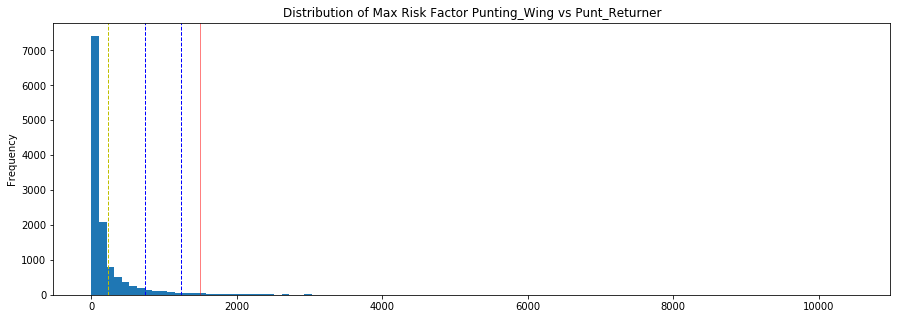

Gunner Defensive_Backer


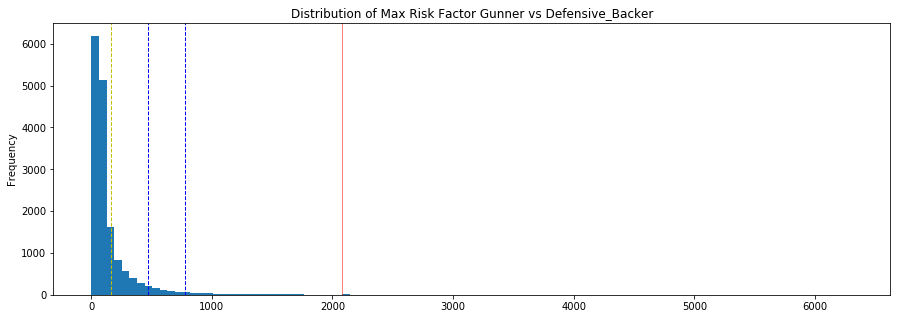

Gunner Punt_Returner


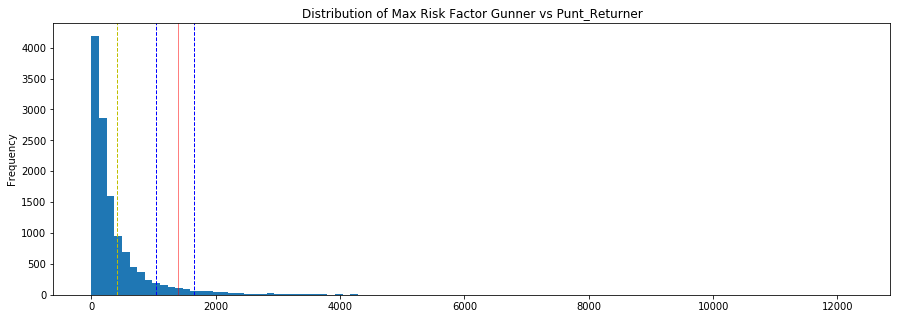

Punting_Lineman Punt_Returner


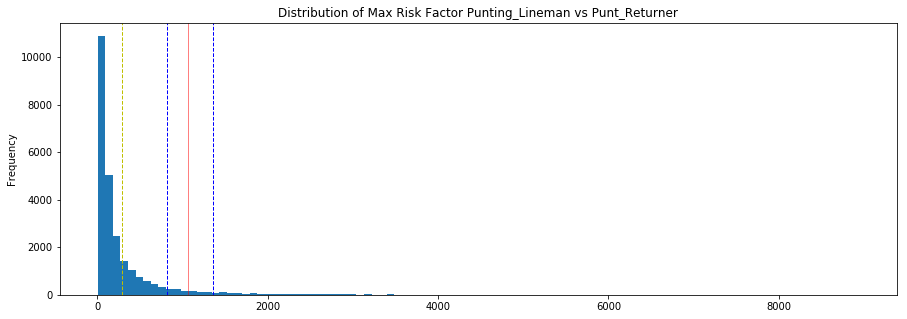

Punting_Lineman Gunner


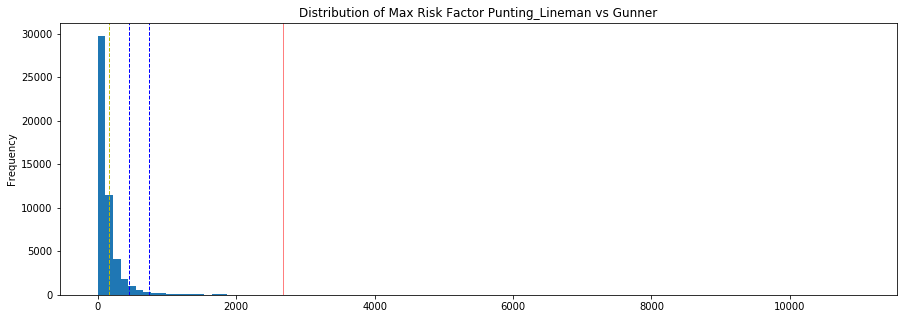

Punting_Wing Defensive_Lineman


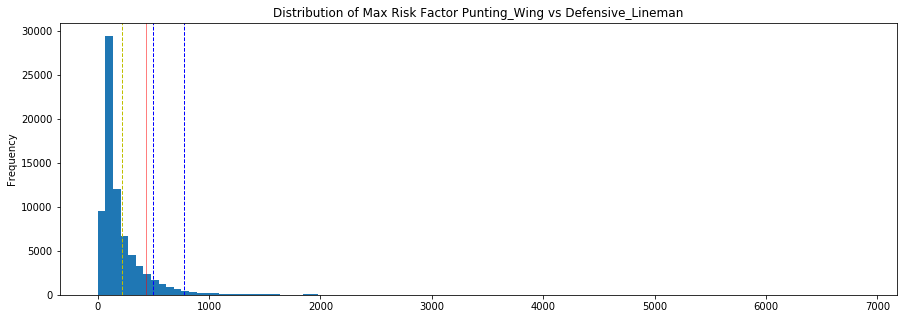

Jammer Punting_Lineman


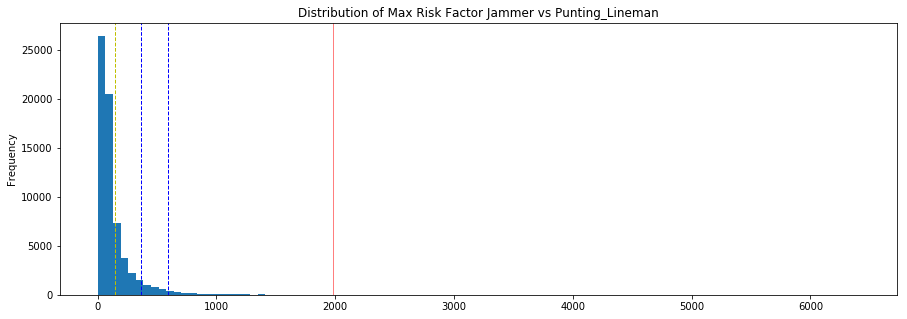

PuntFullBack Punting_Lineman


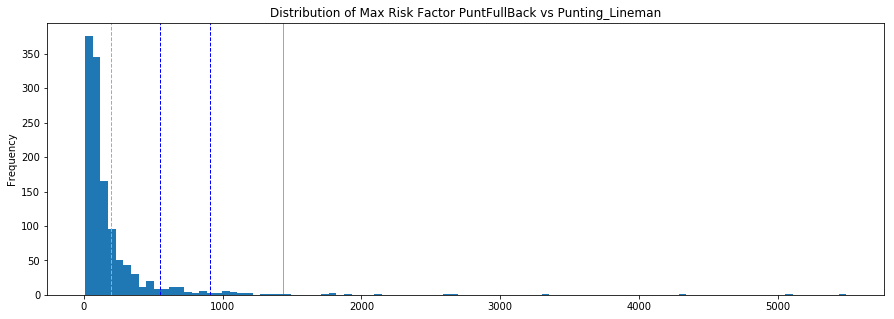

Punt_Returner Punting_Lineman


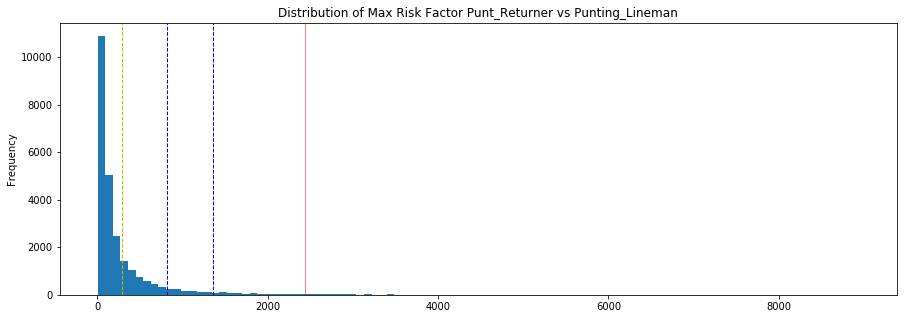

Did not work
Empty 'DataFrame': no numeric data to plot
Punting_Lineman Punting_Wing


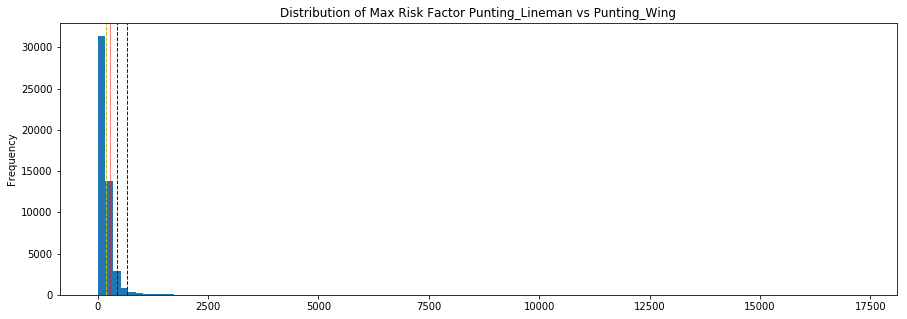

Punting_Lineman Punt_Returner


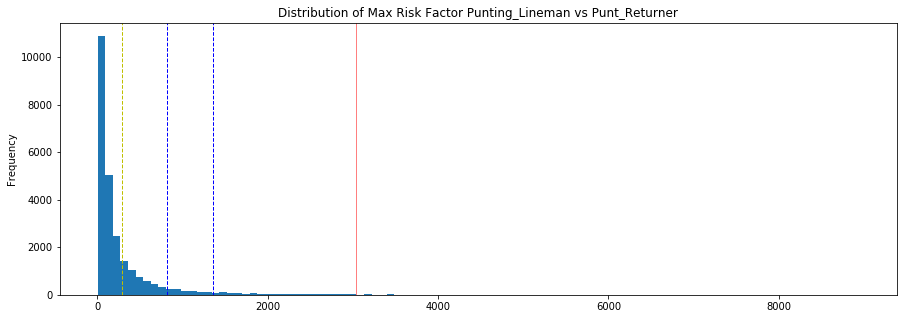

Punt_Returner Gunner


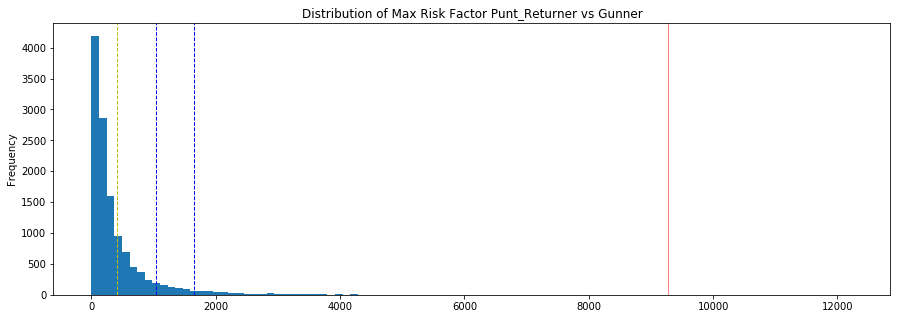

Punter Jammer


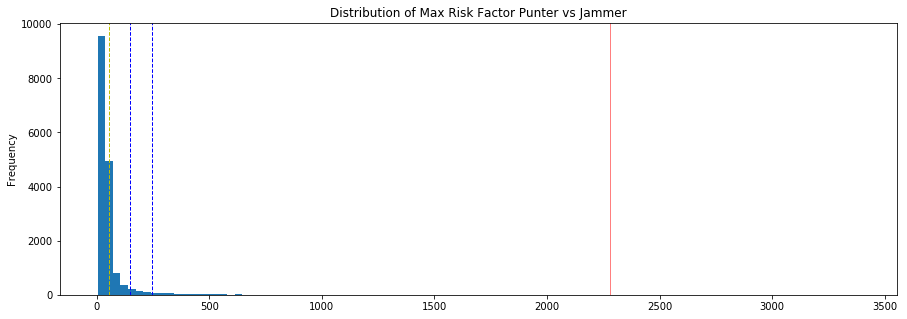

Punting_Wing Defensive_Lineman


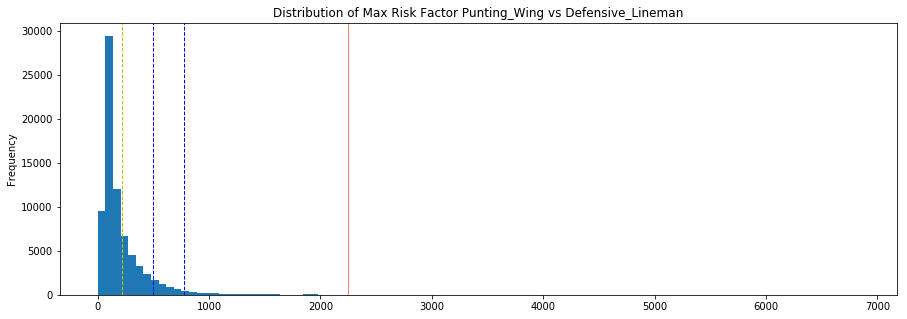

Gunner Punt_Returner


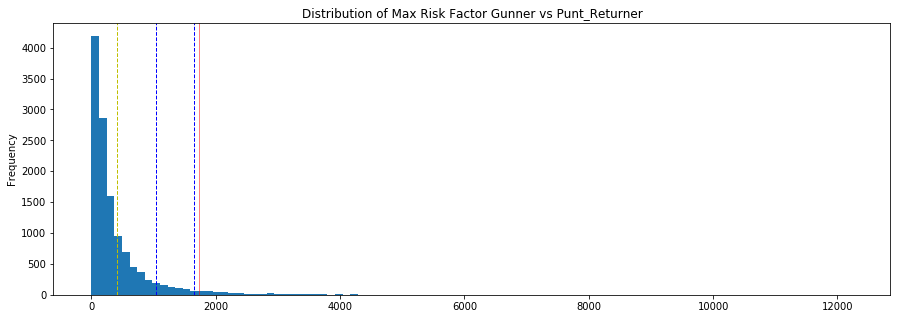

Punting_Lineman Punting_Wing


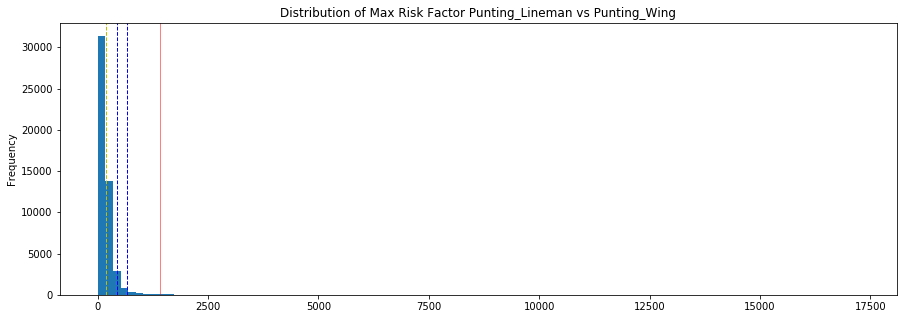

Gunner Defensive_Lineman


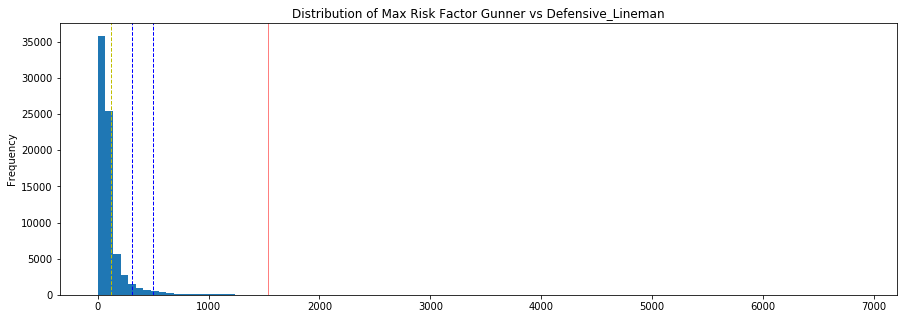

Gunner Gunner


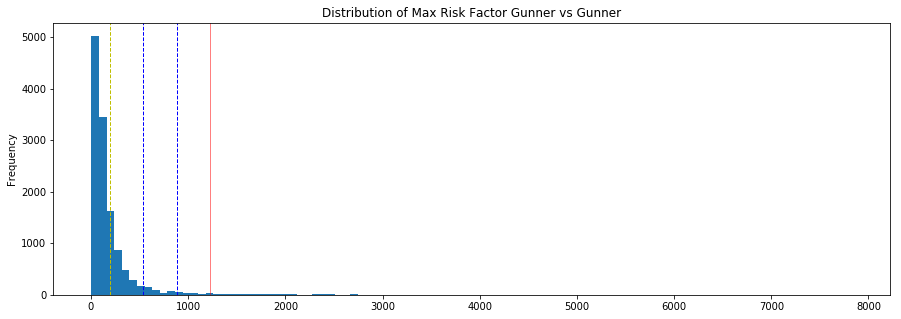

Punting_Lineman Punt_Returner


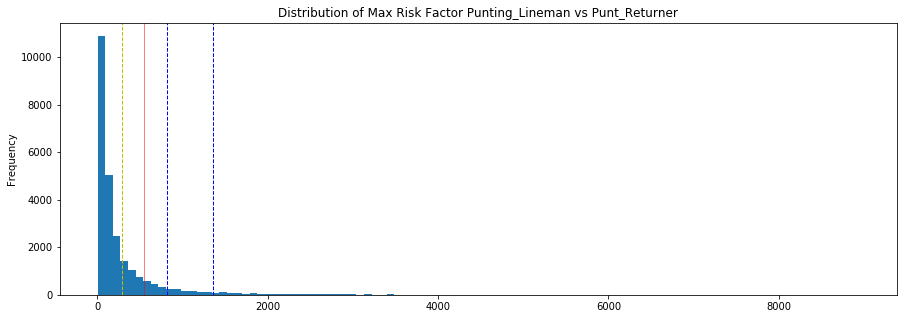

Punting_Lineman Defensive_Lineman


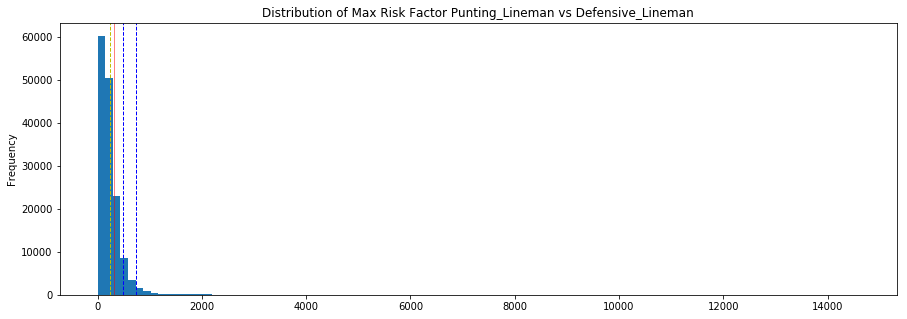

Punting_Lineman Defensive_Lineman


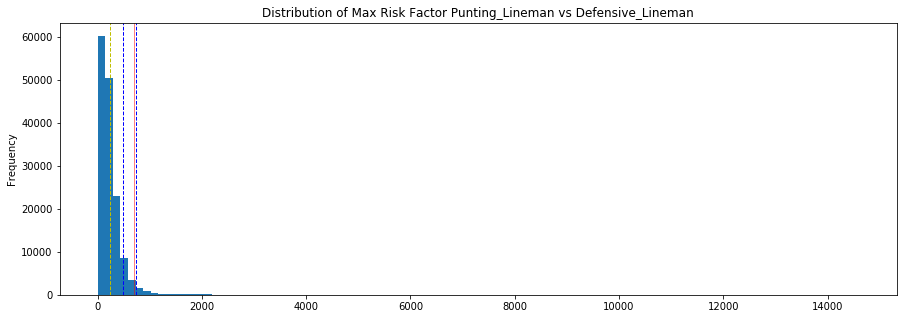

Punter_Protector Punting_Lineman


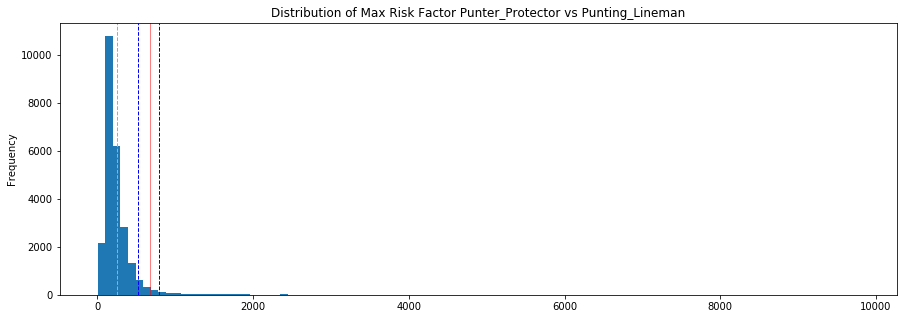

Punting_Longsnapper Defensive_Lineman


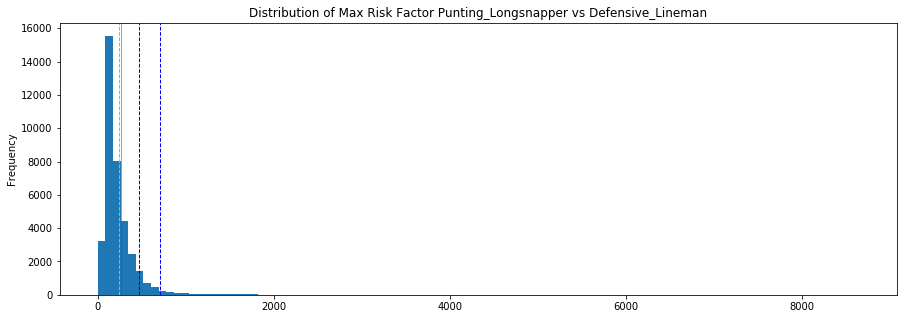

Punting_Lineman Punt_Returner


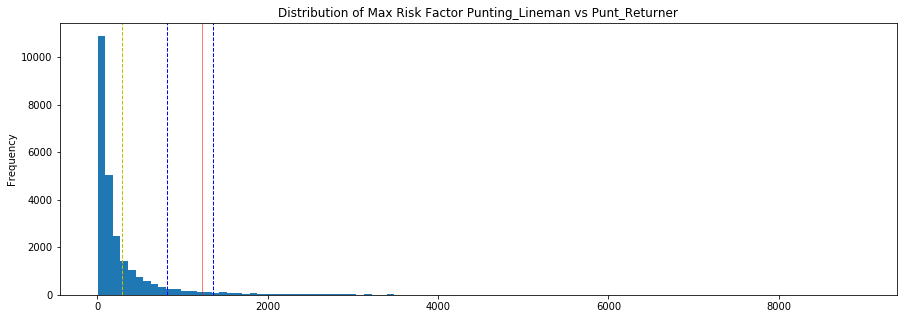

Punt_Returner Punting_Lineman


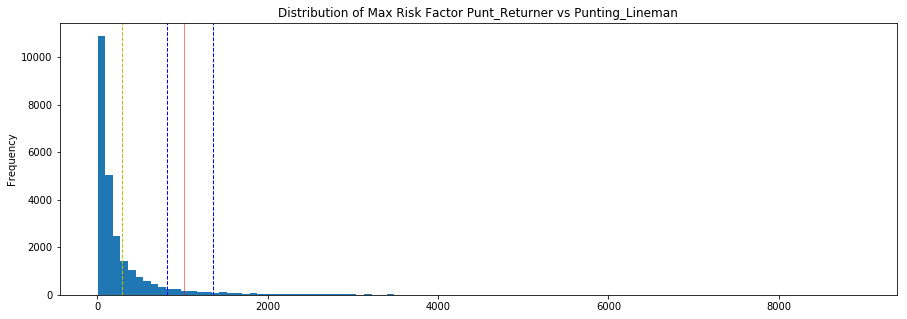

Did not work
Empty 'DataFrame': no numeric data to plot
Defensive_Lineman Punting_Lineman


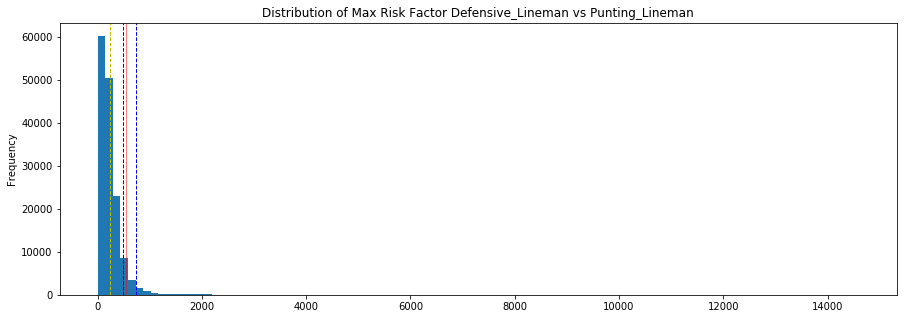

Punting_Lineman Punting_Lineman


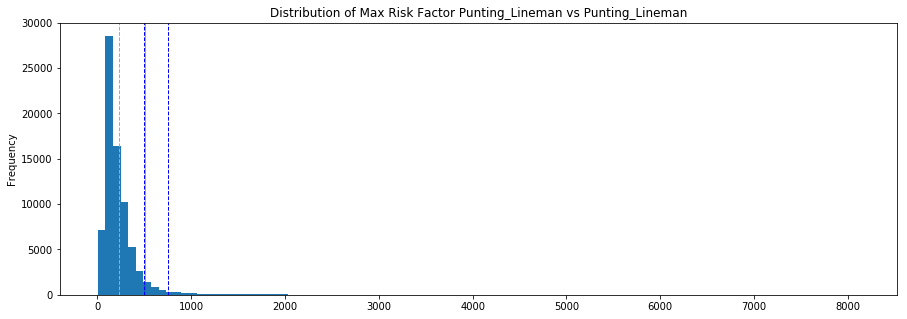

Did not work
Empty 'DataFrame': no numeric data to plot
Defensive_Lineman Punting_Longsnapper


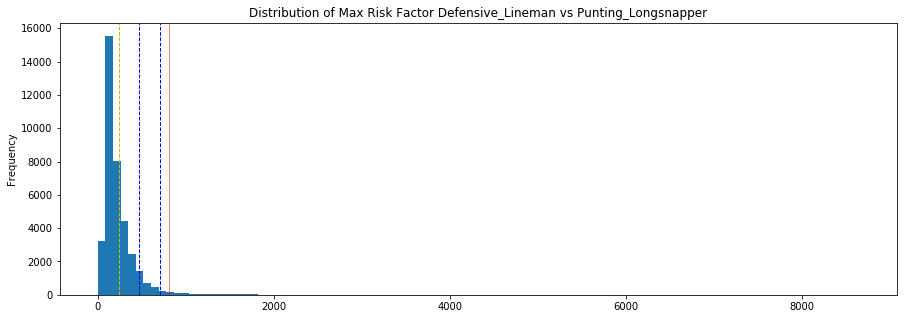

Defensive_Backer Gunner


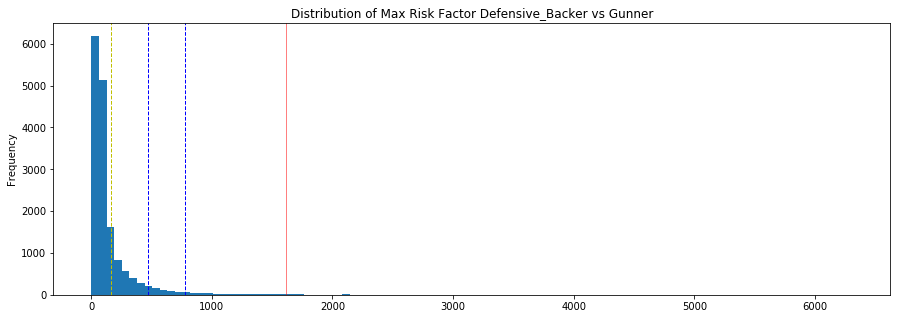

Punt_Returner Punter_Protector


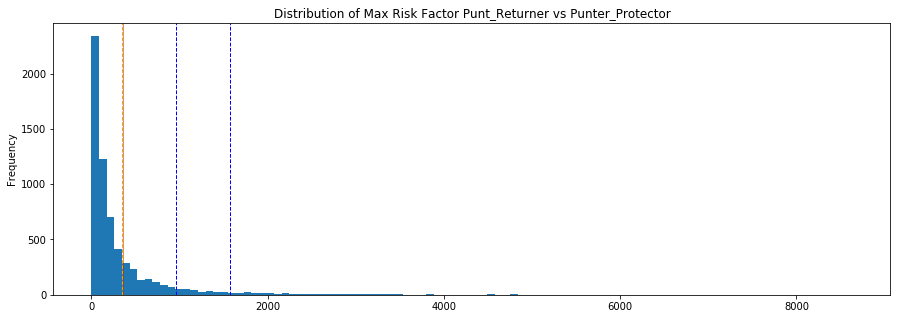

Did not work
Empty 'DataFrame': no numeric data to plot
Punting_Longsnapper Punt_Returner


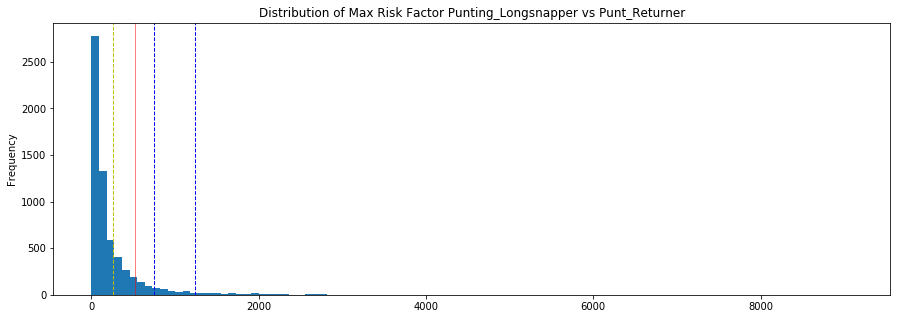

Punting_Wing Defensive_Lineman


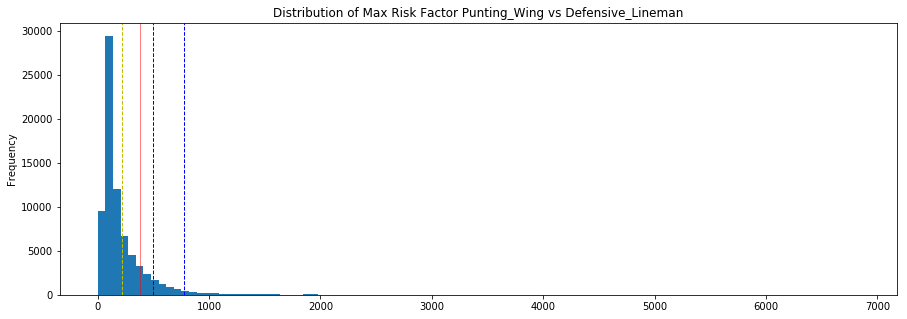

Punting_Lineman Defensive_Lineman


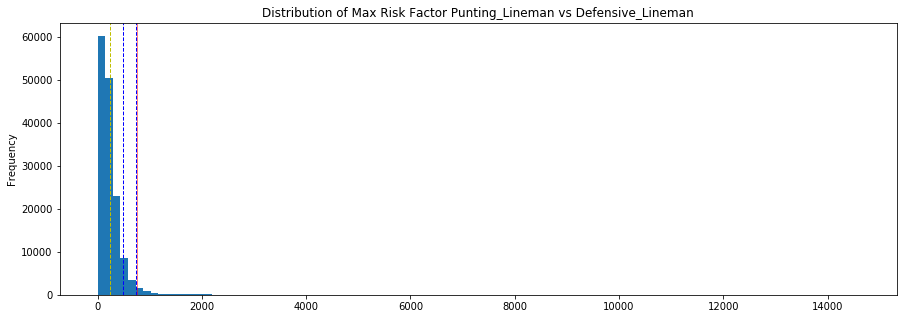

In [197]:
for row in vr.iterrows():
    try:
        gsisid = row[1]['GSISID']
        gsisid_partner = row[1]['Primary_Partner_GSISID']
        gen_role = row[1]['generalized_role']
        gen_role_partner = row[1]['generalized_role_Primary_Partner']
        df_match = df.loc[(df['generalized_role'] == gen_role) & (df['generalized_role_partner'] == gen_role_partner)]
        df_match['risk_factor'].plot(kind='hist', figsize=(15, 5), bins=100, title='Distribution of Max Risk Factor {} vs {}'.format(gen_role, gen_role_partner))
        print(gen_role, gen_role_partner)
        season_year = row[1]['Season_Year']
        gamekey = row[1]['GameKey']
        playid = row[1]['PlayID']
        risk_factor_injury = df_match.loc[(df_match['season_year'] == season_year) &
                     (df_match['gamekey'] == gamekey) &
                     (df_match['playid'] == playid) &
                     (df_match['gsisid'] == gsisid) &
                     (df_match['gsisid_partner'] == gsisid_partner)]['risk_factor'].values[0]
        plt.axvline(x=risk_factor_injury, color='red', linewidth=0.5)
        plt.axvline(df_match['risk_factor'].mean(), color='y', linestyle='dashed', linewidth=1)
        first_std_dev_above_mean = df_match['risk_factor'].mean() + df_match['risk_factor'].std()
        two_std_dev_above_mean = df_match['risk_factor'].mean() + 2 * df_match['risk_factor'].std()
        plt.axvline(first_std_dev_above_mean, color='blue', linestyle='dashed', linewidth=1)
        plt.axvline(two_std_dev_above_mean, color='blue', linestyle='dashed', linewidth=1)
        plt.show()
    except Exception as e:
        print('Did not work')
        print(e)

# Calculate the Mean and Mean + Std dev for two players

In [212]:
risk_metrics_by_rolepair = df.groupby(['role','role_partner'])['risk_factor'].agg([np.mean, np.std, 'count']).reset_index()

In [215]:
risk = pd.merge(df, risk_metrics_by_rolepair, suffixes=('','_risk_factor_pair'))

In [220]:
high_risk = risk.loc[(risk['count'] > 100) &
                     ((risk['mean'] + risk['std']) < risk['risk_factor'])]

In [239]:
high_high_risk = risk.loc[(risk['count'] > 100) &
                          ((risk['mean'] + risk['std']) < risk['risk_factor']) &
                          (risk['risk_factor'] > 1000)]

In [240]:
high_risk.shape

(192708, 29)

In [241]:
df.shape

(2879896, 26)

In [243]:
high_high_risk.shape

(38648, 29)

In [247]:
high_high_risk.loc[~high_high_risk[['season_year', 'gamekey', 'playid']].duplicated()].shape
high_high_risk['count'] = 1

/home/robmulla/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [254]:
play_risk_values = high_high_risk.groupby(['season_year', 'gamekey', 'playid']).agg('count')[['count']].reset_index().sort_values('count', ascending=False)

In [257]:
pi = pd.read_csv('../input/play_information.csv')

In [268]:
play_with_risk = pd.merge(pi, play_risk_values, left_on=['Season_Year','GameKey','PlayID'],
        right_on=['season_year','gamekey','playid'], how='left').fillna(0).sort_values('count', ascending=False)
play_with_risk = play_with_risk.rename(columns={'count':'risk_factor'})

In [272]:
play_with_risk[['PlayDescription']].values

array([['(14:10) B.Wing punts 51 yards to OAK 21, Center-Z.DeOssie. J.Richard to OAK 40 for 19 yards (R.Armstrong). FUMBLES (R.Armstrong), recovered by OAK-K.McGill at OAK 40. K.McGill to OAK 40 for no gain (Team).'],
       ['(13:20) C.Schmidt punts 55 yards to OAK 13, Center-R.Ferguson. J.Richard to OAK 17 for 4 yards (M.Milano). FUMBLES (M.Milano), RECOVERED by BUF-M.Tolbert at OAK 14. Penalty on OAK-K.McGill, Offensive Holding, declined. The Replay Official reviewed the fumble ruling, and the play was Upheld. The ruling on the field stands.'],
       ['(12:20) (Punt formation) S.Koch punts 33 yards to CLV 18, Center-M.Cox, downed by BLT-C.Clark.'],
       ...,
       ['(4:57) T.Way punts 33 yards to PHI 13, Center-N.Sundberg, fair catch by D.Sproles.'],
       ['(9:37) T.Way punts 49 yards to PHI 6, Center-N.Sundberg, downed by WAS-Q.Dunbar.'],
       ['(13:16) D.Jones punts 41 yards to NE 37, Center-R.Lovato, fair catch by D.Amendola.']],
      dtype=object)

In [276]:
pi.columns = [col.lower() for col in pi.columns]

In [350]:

penalties_list = ['Offensive Holding', 'Defensive 12 On-field', 'Illegal Block Above the Waist', 'Fair Catch Interference',
                  'Running Into the Kicker', 'Unnecessary Roughness', 'Illegal Touch Kick',
                  'Illegal Use of Hands', 'False Start', 'Out of Bounds on Punt', 'Horse Collar Tackle',
                  'Face Mask', 'Ineligible Downfield Kick', 'Illegal Substitution', 'Illegal Formation',
                  'Delay of Game', 'Illegal Blindside Block', 'Neutral Zone Infraction', 'Tripping',
                  'Defensive Holding', 'Roughing the Kicker', 'Unsportsmanlike Conduct', 'Defensive Offside',
                  'Interference with Opportunity to Catch', 'Illegal Motion', 'Chop Block', 'Clipping',
                  'Invalid Fair Catch Signal', 'Illegal Shift', 'Offensive 12 On-field', 'Taunting',
                  'Offensive Pass Interference', 'Disqualification', 'Defensive Pass Interference']

pi['PENALTY'] = (pi['playdescription'].str.contains('PENALTY') | pi['playdescription'].str.contains('Penalty'))
pi['declined'] = pi['playdescription'].str.contains('declined')


pi['Offensive Holding'] =  pi['playdescription'].str.contains('Offensive Holding')
pi['Defensive 12 On-field'] =  pi['playdescription'].str.contains('Defensive 12 On-field')
pi['Illegal Block Above the Waist'] =  pi['playdescription'].str.contains('Illegal Block Above the Waist')
pi['Fair Catch Interference'] = pi['playdescription'].str.contains('Fair Catch Interference')
pi['Running Into the Kicker'] = pi['playdescription'].str.contains('Running Into the Kicker')
pi['Unnecessary Roughness'] = pi['playdescription'].str.contains('Unnecessary Roughness')
pi['Illegal Touch Kick'] = pi['playdescription'].str.contains('Illegal Touch Kick')
pi['Illegal Use of Hands'] = pi['playdescription'].str.contains('Illegal Use of Hands')
pi['False Start'] = pi['playdescription'].str.contains('False Start')
pi['Out of Bounds on Punt'] = pi['playdescription'].str.contains('Out of Bounds on Punt')
pi['Horse Collar Tackle'] = pi['playdescription'].str.contains('Horse Collar Tackle')
pi['Face Mask'] = pi['playdescription'].str.contains('Face Mask')
pi['Ineligible Downfield Kick'] = pi['playdescription'].str.contains('Ineligible Downfield Kick')
pi['Illegal Substitution'] = pi['playdescription'].str.contains('Illegal Substitution')
pi['Illegal Formation'] = pi['playdescription'].str.contains('Illegal Formation')
pi['Delay of Game'] = pi['playdescription'].str.contains('Delay of Game')
pi['Illegal Blindside Block'] = pi['playdescription'].str.contains('Illegal Blindside Block')
pi['Neutral Zone Infraction'] = pi['playdescription'].str.contains('Neutral Zone Infraction')
pi['Tripping'] = pi['playdescription'].str.contains('Tripping')
pi['Defensive Holding'] = pi['playdescription'].str.contains('Defensive Holding')
pi['Roughing the Kicker'] = pi['playdescription'].str.contains('Roughing the Kicker')
pi['Unsportsmanlike Conduct'] = pi['playdescription'].str.contains('Unsportsmanlike Conduct')
pi['Defensive Offside'] = pi['playdescription'].str.contains('Defensive Offside')
pi['Interference with Opportunity to Catch'] = pi['playdescription'].str.contains('Interference with Opportunity to Catch')
pi['Illegal Motion'] = pi['playdescription'].str.contains('Illegal Motion')
pi['Chop Block'] = pi['playdescription'].str.contains('Chop Block')
pi['Clipping'] = pi['playdescription'].str.contains('Clipping')
pi['Invalid Fair Catch Signal'] = pi['playdescription'].str.contains('Invalid Fair Catch Signal')
pi['Illegal Shift'] = pi['playdescription'].str.contains('Illegal Shift')
pi['Offensive 12 On-field'] = pi['playdescription'].str.contains('Offensive 12 On-field')
pi['Taunting'] = pi['playdescription'].str.contains('Taunting')
pi['Offensive Pass Interference'] = pi['playdescription'].str.contains('Offensive Pass Interference')
pi['Disqualification'] = pi['playdescription'].str.contains('Disqualification')
pi['Defensive Pass Interference'] = pi['playdescription'].str.contains('Defensive Pass Interference')

pi['count'] = 1


pi['REVERSED'] = pi['playdescription'].str.contains('REVERSED')
pi['out of bounds'] = pi['playdescription'].str.contains('out of bounds')
pi['Touchback'] = pi['playdescription'].str.contains('Touchback')
pi['fair catch'] = pi['playdescription'].str.contains('fair catch')
pi['MUFF'] = pi['playdescription'].str.contains('MUFF')
pi['downed'] = pi['playdescription'].str.contains('downed')
pi['BLOCKED'] = pi['playdescription'].str.contains('BLOCKED')
pi['TOUCHDOWN'] = pi['playdescription'].str.contains('TOUCHDOWN')
pi['no gain'] = pi['playdescription'].str.contains('no gain')
pi['FUMBLES'] = pi['playdescription'].str.contains('FUMBLES')
pi['pass incomplete'] = pi['playdescription'].str.contains('pass incomplete')

pi['Returned'] = (~pi['No Play'] &
                    ~pi['out of bounds'] &
                    ~pi['Touchback'] &
                    ~pi['fair catch'] &
                    ~pi['downed'] &
                    ~pi['MUFF'] &
                    ~pi['BLOCKED'] &
                    ~pi['PENALTY'] &
                    ~pi['no gain'] &
                    ~pi['FUMBLES'] &
                    ~pi['pass incomplete'])

pi['returned for'] = pi[~pi['No Play'] &
                        ~pi['out of bounds'] &
                        ~pi['Touchback'] &
                        ~pi['fair catch'] &
                        ~pi['downed'] &
                        ~pi['MUFF'] &
                        ~pi['BLOCKED'] &
                        ~pi['PENALTY'] &
                        ~pi['no gain'] &
                        ~pi['FUMBLES'] &
                        ~pi['pass incomplete']]['playdescription'].str.extract('(for .* yard)', expand=True).fillna(False)

# Cleanup ugly retrun yards and get int
pi['return_yards'] = pi['returned for'].replace('for -2 yards. Lateral to C.Patterson to MIN 31 for 9 yards (W.Woodyard', 'for 9 yards') \
    .replace('for -4 yards. Lateral to R.Mostert to SEA 35 for 33 yard', 'for 33 yard') \
    .replace('for 10 yards (K.Byard', 'for 11 yard') \
    .replace('for 12 yards (A.Blake; W.Woodyard','for 12 yard') \
    .replace('for 14 yards (N.Palmer; K.Byard','for 14 yard') \
    .replace('for 44 yards (R.Blanton; C.Schmidt). Buffalo challenged the runner was in bounds ruling, and the play was REVERSED. C.Schmidt punts 35 yards to SEA 38, Center-G.Sanborn. T.Lockett ran ob at BUF 40 for 22 yard', 'for 22 yard') \
    .replace('for 2 yards (W.Woodyard','for 2 yard') \
    .replace('for -2 yards. Lateral to C.Patterson to MIN 31 for 9 yard','for 9 yard') \
    .replace('for 34 yards (C.Goodwin). Atlanta challenged the runner was in bounds ruling, and the play was REVERSED. M.Bosher punts 56 yards to NE 21, Center-J.Harris. J.Edelman ran ob at NE 47 for 26 yard', 'for 26 yard') \
    .dropna() \
    .str.replace('for ','').str.replace('yard','').astype('int')
# Zero return yards for 'no gain'
pi.loc[pi['no gain'], 'return_yards'] = 0

In [351]:
pi = pi.drop('count', axis=1)

In [352]:
play_with_risk = pd.merge(pi, play_risk_values, left_on=['season_year','gamekey','playid'],
        right_on=['season_year','gamekey','playid'], how='left').fillna(0).sort_values('count', ascending=False)
play_with_risk = play_with_risk.rename(columns={'count':'risk_factor'})

# Linear Regression of Play Outcome and Risk Factor

In [354]:
from sklearn.linear_model import LinearRegression

In [355]:
X = play_with_risk[['out of bounds','Touchback','fair catch',
                    'MUFF','downed','BLOCKED','TOUCHDOWN','no gain',
                    'pass incomplete','No Play','Returned']]

y = play_with_risk['risk_factor']

In [356]:
lr = LinearRegression()

In [357]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [358]:
lr.coef_

array([-5.62045073, -5.21254777, -5.53473349,  2.65485191, -4.62274177,
        1.47384855, -0.46329628,  1.31238313, -4.63324918, -3.94759265,
        0.71265933])

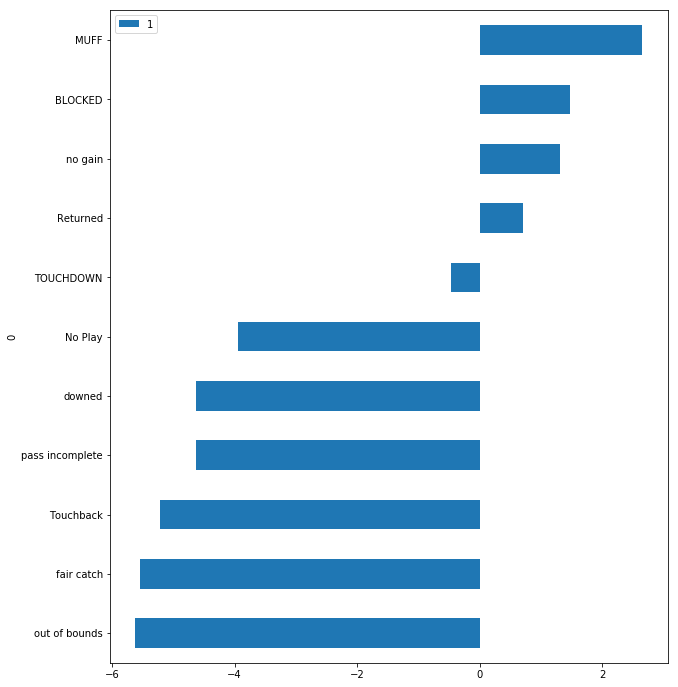

In [371]:
pd.DataFrame([X.columns, lr.coef_]).T.set_index(0).sort_values(1).plot(kind='barh', figsize=(10, 12))

In [373]:
ppd = pd.read_csv('../input/player_punt_data.csv')

In [375]:
pprd = pd.read_csv('../input/play_player_role_data.csv')

In [422]:
pprd['PlayUnique'] = pprd['Season_Year'].astype(str).add('-').add(pprd['GameKey'].astype('str')).add('-').add(pprd['PlayID'].astype('str'))
pprd['count'] = True
pprd_unique = pprd.groupby(['PlayUnique','Role']) \
    .count()['count'] \
    .reset_index() \
    .sort_values('count') \
    .pivot(index='PlayUnique', columns='Role', values='count') \
    .fillna(0) \
    .astype('int') \
    .reset_index()

In [423]:
play_with_risk['PlayUnique'] = play_with_risk['season_year'].astype(str).add('-').add(play_with_risk['gamekey'].astype('str')).add('-').add(play_with_risk['playid'].astype('str'))

In [424]:
play_with_risk.shape

(6681, 67)

In [433]:
play_with_risk.merge(pprd_unique)

,season_year,season_type,gamekey,game_date,week,playid,game_clock,yardline,quarter,play_type,poss_team,home_team_visit_team,score_home_visiting,playdescription,REVERSED,out of bounds,Touchback,fair catch,MUFF,downed,BLOCKED,TOUCHDOWN,no gain,FUMBLES,pass incomplete,No Play,PENALTY,declined,Offensive Holding,Defensive 12 On-field,Illegal Block Above the Waist,Fair Catch Interference,Running Into the Kicker,Unnecessary Roughness,Illegal Touch Kick,Illegal Use of Hands,False Start,Out of Bounds on Punt,Horse Collar Tackle,Face Mask,Ineligible Downfield Kick,Illegal Substitution,Illegal Formation,Delay of Game,Illegal Blindside Block,Neutral Zone Infraction,Tripping,Defensive Holding,Roughing the Kicker,Unsportsmanlike Conduct,...,GLo,GR,GRi,GRo,P,PC,PDL1,PDL2,PDL3,PDL4,PDL5,PDL6,PDM,PDR1,PDR2,PDR3,PDR4,PDR5,PDR6,PFB,PLG,PLL,PLL1,PLL2,PLL3,PLM,PLM1,PLR,PLR1,PLR2,PLR3,PLS,PLT,PLW,PPL,PPLi,PPLo,PPR,PPRi,PPRo,PR,PRG,PRT,PRW,VL,VLi,VLo,VR,VRi,VRo
0,2017,Reg,588,12/03/2017,13,116,14:10,NYG 28,1,Punt,NYG,OAK-NYG,0 - 0,"(14:10) B.Wing punts 51 yards to OAK 21, Cente...",False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0
1,2017,Reg,508,10/29/2017,8,2398,13:20,BUF 32,3,Punt,BUF,BUF-OAK,14 - 7,"(13:20) C.Schmidt punts 55 yards to OAK 13, Ce...",False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0
2,2017,Reg,416,09/17/2017,2,2415,12:20,BLT 49,3,Punt,BLT,BLT-CLV,21 - 7,(12:20) (Punt formation) S.Koch punts 33 yards...,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0
3,2016,Reg,159,10/23/2016,7,1890,02:19,NYG 37,2,Punt,NYG,LA-NYG,10 - 10,(2:19) (Punt formation) B.Wing punts 49 yards ...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,0,1,1
4,2016,Reg,250,12/04/2016,13,741,02:33,NE 43,1,Punt,NE,NE-LA,7 - 0,"(2:33) R.Allen punts 39 yards to LA 18, Center...",False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0
5,2016,Reg,170,10/23/2016,7,3304,10:50,PIT 28,4,Punt,PIT,PIT-NE,16 - 27,(10:50) (Punt formation) J.Berry punts 43 yard...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,1,1,1,0,0
6,2016,Reg,128,10/03/2016,4,355,09:20,MIN 8,1,Punt,MIN,MIN-NYG,0 - 0,(9:20) (Punt formation) J.Locke punts 53 yards...,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0